In [31]:
#Importing libreries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.DataFrame(pd.read_csv("Dataset\encoded_dataset.csv")) 

In [33]:
df['Gender'].value_counts()

Gender
m    1414
f    1086
Name: count, dtype: int64

In [34]:
# Label encode the 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [35]:
print(df.head())

        ID  Gender  PHI  MHI  FI  LD  SCI  UE  TI  APM
0  1711182       1    1    0   1   1    0   1   0    5
1  2312321       0    0    0   1   1    1   1   0    4
2  1510645       0    1    1   0   0    1   0   1    1
3  2311271       1    1    0   1   0    1   1   1    5
4  2211591       1    1    1   0   0    1   0   0    3


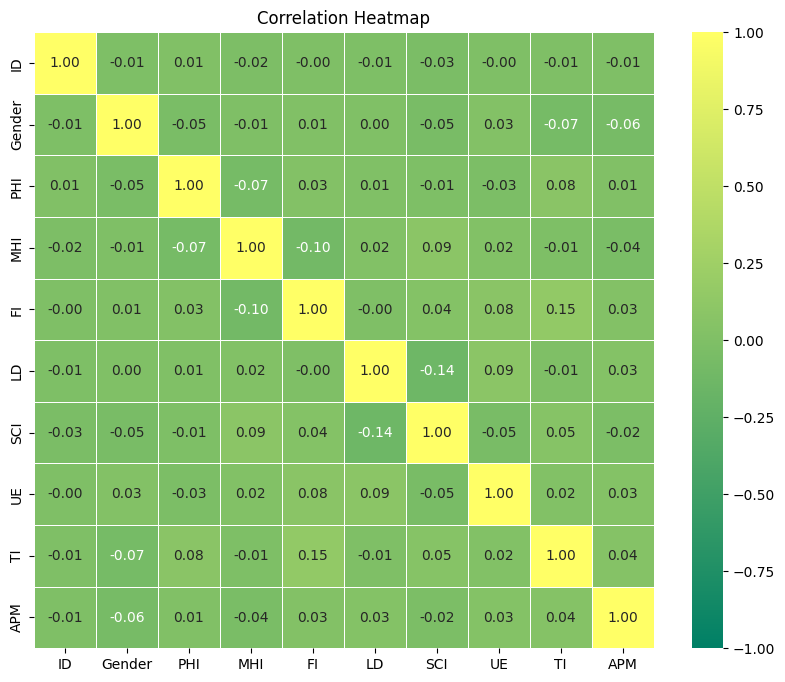

In [36]:
# Correlation matrix
correlation_matrix = df.corr()

# Drop the 'ID' column
df = df.drop(['ID', 'Gender'], axis=1)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'summer', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
X = df.drop(['APM'], axis=1)
y = df['APM']
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (2500, 7)
y shape  (2500,)


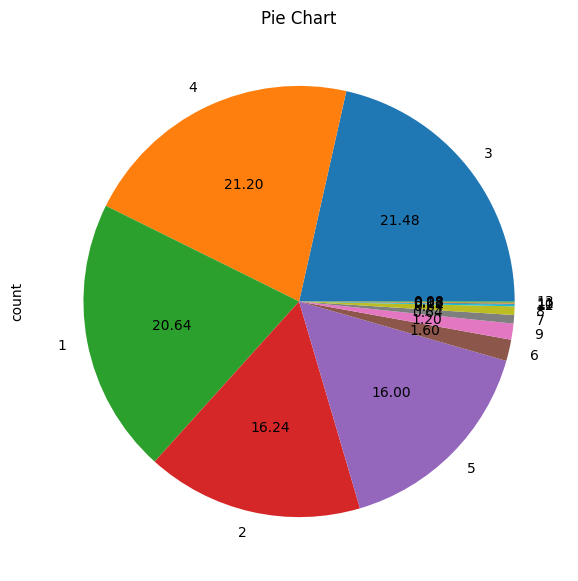

APM
3     537
4     530
1     516
2     406
5     400
6      40
9      30
7      16
8      16
12      3
10      2
11      2
13      2
Name: count, dtype: int64

In [38]:
#understanding the target column
plt.figure(figsize=(7,7))
df['APM'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Pie Chart')
plt.show()

df['APM'].value_counts()

# Data Balance

In [39]:
#Finding Majority and Minority class
class_counts = df['APM'].value_counts()

# Find the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

print("Majority class:", majority_class)
print("Minority class:", minority_class)

Majority class: 3
Minority class: 10


We are combining the minority classes (e.g. classes that have less than 50 samples)

In [40]:
import pandas as pd

# Loading the dataset into a DataFrame
df = pd.read_csv('Dataset\encoded_dataset.csv')

# Drop the 'Gender' column
df.drop('Gender', axis=1, inplace=True)

# Targeted variable 'APM'
class_counts = df['APM'].value_counts()

# Defining the threshold for combining minority classes
threshold = 50  
class_mapping = {}

# Iterate over the class counts
for class_label, count in class_counts.items():
    if count < threshold:
        class_mapping[class_label] = '5+'
    else:
        class_mapping[class_label] = str(class_label)  # Keep the original class label

# Map the class labels to their broader categories
df['APM'] = df['APM'].map(class_mapping).fillna(df['APM'])

# Save the updated DataFrame to a new CSV file
df.to_csv('Dataset\encoded_dataset_updated.csv', index=False)


Shape of X after SMOTE: (3222, 8)
Shape of y after SMOTE: (3222,)


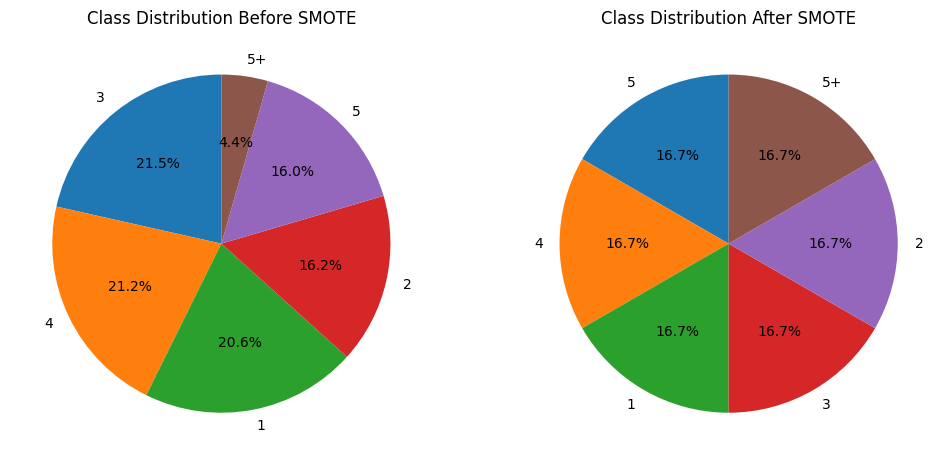

In [41]:
from imblearn.over_sampling import SMOTE

df1 = pd.read_csv('Dataset\encoded_dataset_updated.csv')

# Cell 3: Apply SMOTE to balance the dataset
# Assuming 'X' contains your features and 'y' contains your target variable
X = df.drop('APM', axis=1)  # Assuming 'target' is the name of the target variable
y = df['APM']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cell 4: Print the shape of the resampled dataset
print("Shape of X after SMOTE:", X_resampled.shape)
print("Shape of y after SMOTE:", y_resampled.shape)

# Cell 5: Create a pie chart to visualize class distribution before and after SMOTE
# Calculate class distribution before SMOTE
class_counts_before = y.value_counts()

# Calculate class distribution after SMOTE
class_counts_after = pd.Series(y_resampled).value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot class distribution before SMOTE
axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Class Distribution Before SMOTE')

# Plot class distribution after SMOTE
axs[1].pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Class Distribution After SMOTE')

# Show the plot
plt.show()


In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)

X, y = smote.fit_resample(X, y)

print("X shape after SMOTE:", X.shape)
print("y shape after SMOTE:", y.shape)


X shape after SMOTE: (3222, 8)
y shape after SMOTE: (3222,)


In [43]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size =0.2)

In [44]:
y_train.value_counts(normalize=True)*100

APM
5     16.880093
1     16.763679
3     16.647264
5+    16.608459
2     16.608459
4     16.492045
Name: proportion, dtype: float64

In [45]:
y_test.value_counts(normalize =True)*100

APM
4     17.364341
2     16.899225
5+    16.899225
3     16.744186
1     16.279070
5     15.813953
Name: proportion, dtype: float64

In [46]:
#stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =0.2, stratify = y)

In [47]:
y_train.value_counts(normalize=True)*100

APM
5+    16.686069
2     16.686069
1     16.686069
4     16.647264
5     16.647264
3     16.647264
Name: proportion, dtype: float64

In [48]:
y_test.value_counts(normalize =True)*100

APM
4     16.744186
5     16.744186
3     16.744186
2     16.589147
5+    16.589147
1     16.589147
Name: proportion, dtype: float64

In [49]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2577, 8) (2577,) (645, 8) (645,)


# ML Models

In [50]:
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

print("X shape", X.shape)
print("y shape", y.shape)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X shape (3222, 8)
y shape (3222,)


In [51]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.23      0.26       107
           2       0.35      0.44      0.39       107
           3       0.25      0.28      0.26       108
           4       0.31      0.28      0.29       108
           5       0.26      0.11      0.16       108
          5+       0.35      0.51      0.41       107

    accuracy                           0.31       645
   macro avg       0.30      0.31      0.30       645
weighted avg       0.30      0.31      0.29       645



In [52]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25, )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [53]:
y_pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))

Test Accuracy  0.3689922480620155
              precision    recall  f1-score   support

           1       0.37      0.36      0.37       107
           2       0.40      0.36      0.38       107
           3       0.36      0.33      0.35       108
           4       0.40      0.39      0.40       108
           5       0.24      0.18      0.20       108
          5+       0.39      0.60      0.47       107

    accuracy                           0.37       645
   macro avg       0.36      0.37      0.36       645
weighted avg       0.36      0.37      0.36       645



In [55]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5
0,39,10,26,10,5,17
1,9,38,7,16,17,20
2,6,12,36,14,23,17
3,22,9,9,42,8,18
4,18,16,11,16,19,28
5,12,9,10,6,6,64


In [56]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train)))
print(classification_report(y_train, knn.predict(X_train)))

Train Accuracy  0.4287931703531238
              precision    recall  f1-score   support

           1       0.40      0.39      0.40       430
           2       0.42      0.40      0.41       430
           3       0.43      0.38      0.40       429
           4       0.47      0.40      0.43       429
           5       0.40      0.33      0.36       429
          5+       0.44      0.67      0.53       430

    accuracy                           0.43      2577
   macro avg       0.43      0.43      0.42      2577
weighted avg       0.43      0.43      0.42      2577



In [57]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

In [58]:
# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Generating a classification report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.4201550387596899

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.36      0.31      0.33       107
           2       0.39      0.40      0.40       107
           3       0.33      0.38      0.35       108
           4       0.36      0.36      0.36       108
           5       0.33      0.27      0.30       108
          5+       0.68      0.80      0.74       107

    accuracy                           0.42       645
   macro avg       0.41      0.42      0.41       645
weighted avg       0.41      0.42      0.41       645



In [59]:
#SVM
from sklearn.svm import SVC

# Creating a Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Training the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

In [60]:
# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Generating a classification report
print("\nClassification Report for SVM Classifier:")
print(classification_report(y_test, y_pred_svm))

SVM Classifier Accuracy: 0.4015503875968992

Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           1       0.39      0.41      0.40       107
           2       0.40      0.44      0.42       107
           3       0.38      0.43      0.40       108
           4       0.42      0.44      0.43       108
           5       0.33      0.18      0.23       108
          5+       0.46      0.52      0.49       107

    accuracy                           0.40       645
   macro avg       0.40      0.40      0.39       645
weighted avg       0.40      0.40      0.39       645

